In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#Q1

1.
$$
X_T = e^{-\theta T}X_0 + \mu(1 - e^{-\theta T}) + \sigma\sqrt{\frac{1 - e^{-2\theta T}}{2\theta}} \cdot Z,
$$
where $$ Z \sim \mathcal{N}(0, 1) $$. Since $$ S_0 = \exp(X_0) $$,
$$
S_T = \exp(e^{-\theta T}X_0) \cdot \exp\left(\mu(1 - e^{-\theta T})\right) \cdot \exp\left(\sigma\sqrt{\frac{1 - e^{-2\theta T}}{2\theta}} \cdot Z\right)
$$
$$
= (S_0)e^{-\theta T} \cdot \exp\left(\mu(1 - e^{-\theta T})\right) \cdot \exp\left(\sigma\sqrt{\frac{1 - e^{-2\theta T}}{2\theta}} \cdot Z\right)
$$


$$
\frac{dY}{dS_0} = \frac{dY}{dS_T} \cdot \frac{dS_T}{dS_0} = e^{-rT}1_{S_T<K} \cdot e^{-\theta T}\frac{S_T}{S_0}
$$

In [2]:
S0 = 100
mu = 4.6
theta = 0.1
sigma = 0.3
r = 0.01
T = 1

for K in [90, 100, 110]:
    Z = np.random.normal(size=1000000)
    ST = S0 ** (np.exp(-theta*T)) * np.exp(mu*(1-np.exp(-theta*T))+sigma*np.sqrt((1-np.exp(-2*theta*T))/(2*theta))*Z)
    pathwise = -np.exp(-r*T) * (ST<K) * np.exp(-theta*T) * ST/S0
    print('K: ', K, 'mean: ', np.mean(pathwise), 'variance: ', np.var(pathwise))

K:  90 mean:  -0.23943425838357787 variance:  0.10681403912985542
K:  100 mean:  -0.36228876976281815 variance:  0.13749668214775523
K:  110 mean:  -0.48461992001290144 variance:  0.14886893858720465


In [3]:
#Q2

$$
\mathbb{E}[e^{-rT}h(S_{T/2}, S_T)] = \mathbb{E}[\mathbb{E}[e^{-rT}h(S_{T/2}, S_T)|S_{T/2}]]
$$
$$
= \mathbb{E}\left[ e^{-\frac{rT}{2}} \left( 1_{\{S_{T/2}\leq L\}}C_{BS}\left(\frac{T}{2}, S_{T/2}; r, \sigma, T, K_1\right) + 1_{\{S_{T/2}>L\}}C_{BS}\left(\frac{T}{2}, S_{T/2}; r, \sigma, T, K_2\right) \right) \right]
$$
$$
= \mathbb{E}\left[e^{-\frac{rT}{2}} H(S_{T/2})\right]
$$

Since
$$
\frac{dg(x)}{dS_0} = \frac{\log(x/S_0) - (r - \sigma^2/2)T/2}{S_0 \sigma \sqrt{T/2}} \cdot \frac{1}{g(x)}
$$, we have
$$
\mathbb{E}\left[e^{-\frac{rT}{2}}H(S_{T/2})\right] = \frac{\log(S_{T/2}/S_0) - (r - \sigma^2/2)T/2}{S_0 \sigma \sqrt{T/2}}
$$

$$
e^{-\frac{rT}{2}}H(S_{T/2}) = e^{-\frac{rT}{2}}\left(S_0 e^{(r-\sigma^2/2)T/2+\sigma \sqrt{T/2}Z}\right) \cdot \frac{Z}{S_0 \sigma \sqrt{T/2}}.
$$


In [4]:
import numpy as np

def BS(t, S, r, sigma, T, K):
    d1 = (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    C = stats.norm.cdf(d1)*S - stats.norm.cdf(d2)*K*np.exp(-r*(T-t))
    return C

S0 = 100
sigma = 0.25
r = 0.01
T = 1
K1 = 100
K2 = 110
L = 90

Z = np.random.normal(size=200000)
ST2 = S0 * np.exp(((r-sigma**2/2)*T/2 + sigma*np.sqrt(T/2)*Z))
formula = (ST2 <= L)*BS(T/2, ST2, r, sigma, T, K1) + (ST2 >= L)*BS(T/2, ST2, r, sigma, T, K2)
LR = np.exp(-r*T/2) * formula * Z/(S0*sigma*np.sqrt(T/2))
print(np.mean(LR))

0.40312595973606546


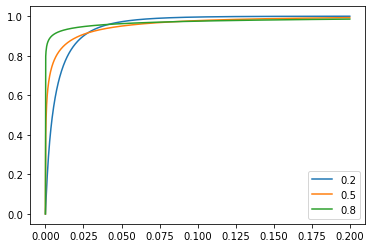

In [6]:
#Q3
rhos = [0.2, 0.5, 0.8]
y = np.linspace(0, 0.2, 1000)

#loss function
def loss_p(y, rho, p=0.01):
    prob = stats.norm.cdf((stats.norm.ppf(1-p) - np.sqrt(1-rho)*stats.norm.ppf(1-y)) / np.sqrt(rho))
    return prob



#iteration
for rho in rhos:
    plt.plot(y, loss_p(y, rho))
plt.legend(rhos)


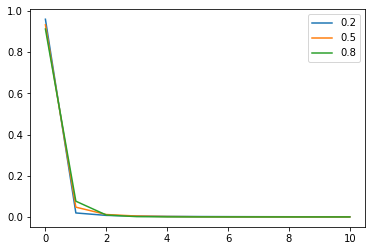

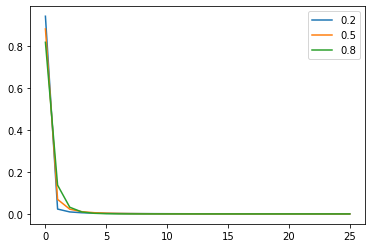

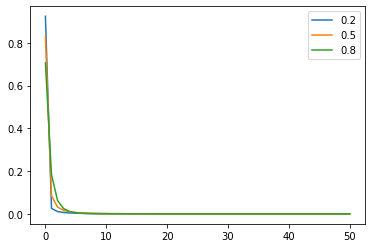

In [8]:
import scipy.stats as st
import scipy.special

dz = 0.01
zs = np.arange(-5, 5, dz)
rhos = [0.2, 0.5, 0.8]

#tild function
def tilde(z, rho, p=0.01):
    x = st.norm.ppf(1-p)
    return 1 - st.norm.cdf((x - np.sqrt(rho)*z) / np.sqrt(1-rho))


#iteration
for m in [10, 25, 50]:
    plt.figure()
    for rho in rhos[::-1]:
        P = []
        for l in range(m+1):
            P.append(scipy.special.comb(m, l) * np.sum(tilde(zs, rho)**l * (1-tilde(zs, rho))**(m-l) * st.norm.pdf(zs) * dz))
        plt.plot(P)
    plt.legend(rhos)

In [9]:
#simulation:
r = 0.5
p = 0.01
m = 50
x = st.norm.ppf(1-p)

sample = 1000000
Z = np.random.normal(size=(sample,1))
epsilon = np.random.normal(size=(sample,m))
X = np.sqrt(r)*Z + np.sqrt(1-r)*epsilon
Y = X>x
L = np.sum(Y, axis=1)

print(np.mean(L>10))

0.007429
